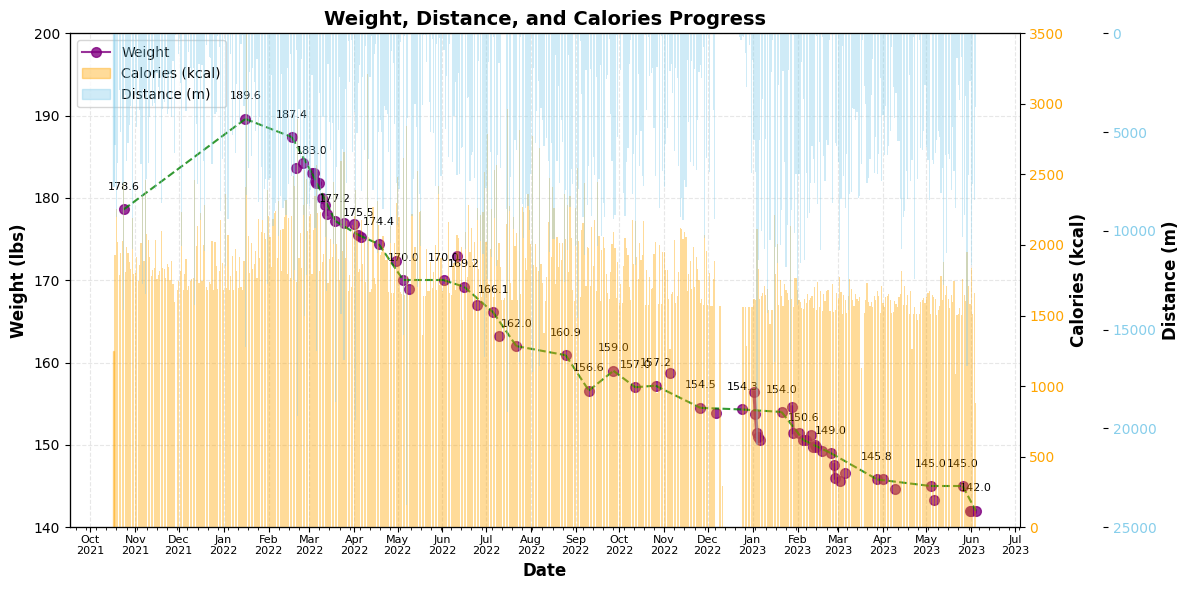

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from datetime import timedelta

# Load the data
metrics = pd.read_csv('metrics.csv')
cols = ['Date', 'Distance (m)', 'Calories (kcal)', 'Average weight (kg)']
metrics = metrics[cols]

# Convert the 'Date' column to datetime type
metrics['Date'] = pd.to_datetime(metrics['Date'])

# Convert weight from kg to lbs
metrics['Average weight (lbs)'] = metrics['Average weight (kg)'] * 2.20462
metrics['Average weight (lbs)'] = metrics['Average weight (lbs)'].round(1)

# Create the plot
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot weight
ax1.plot(metrics['Date'], metrics['Average weight (lbs)'], 'o-', markersize=7, color='purple', alpha=0.8, label='Weight')


# Get the index where weight is not NaN
idx = metrics['Average weight (lbs)'].notna()
# Filter the dataframe to only include rows where weight is not NaN
weight_metrics = metrics[idx]
# Add data labels
annotation_dates = [weight_metrics['Date'].iloc[0], weight_metrics['Date'].iloc[-1]]  # Annotation dates for first and last weight
current_day = weight_metrics['Date'].iloc[0].toordinal()
for x, y in zip(weight_metrics['Date'], weight_metrics['Average weight (lbs)']):
    if not pd.isna(y):
        day = x.toordinal()
        if x in annotation_dates or day - current_day >= 14:
            current_day = day
            label = "{:.1f}".format(y)
            ax1.annotate(
                label,
                (x, y),
                textcoords="offset points",
                xytext=(0, 14),
                ha='center',
                fontsize=8,
                color='black',
                alpha=1
            )
            annotation_dates.append(x)

# Connect weight data points with a line if in annotation_dates
annotation_dates.sort()
for i in range(1, len(annotation_dates)):
    x_start, y_start = annotation_dates[i - 1], metrics.loc[metrics['Date'] == annotation_dates[i - 1], 'Average weight (lbs)'].values[0]
    x_end, y_end = annotation_dates[i], metrics.loc[metrics['Date'] == annotation_dates[i], 'Average weight (lbs)'].values[0]
    ax1.plot([x_start, x_end], [y_start, y_end], linestyle='--', color='green', alpha=0.8, linewidth=1.5)

# Set the y-axis limits
ax1.set_ylim(140, 200)

# Set the y-axis label
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Weight (lbs)', fontsize=12, fontweight='bold')

# Create a secondary y-axis for calories
ax2 = ax1.twinx()
ax2.bar(metrics['Date'], metrics['Calories (kcal)'], color='orange', alpha=0.4, label='Calories (kcal)')
ax2.set_ylabel('Calories (kcal)', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 3500)
ax2.tick_params(axis='y', labelcolor='orange')

# Create a secondary y-axis for distance
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.bar(metrics['Date'], metrics['Distance (m)'], color='skyblue', alpha=0.4, label='Distance (m)')
ax3.set_ylabel('Distance (m)', fontsize=12, fontweight='bold')
ax3.set_ylim(0, 25000)
ax3.invert_yaxis()
ax3.tick_params(axis='y', labelcolor='skyblue')

# Title and legend
ax1.set_title('Weight, Distance, and Calories Progress', fontsize=14, fontweight='bold')
ax1.grid(True, linestyle='--', alpha=0.5)

# Combine legend handles and labels
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines3, labels3 = ax3.get_legend_handles_labels()
legend_handles = lines1 + lines2 + lines3
legend_labels = labels1 + labels2 + labels3
ax1.legend(legend_handles, legend_labels, loc='lower left', fontsize=10)

# Format x-axis ticks
ax1.xaxis.set_major_locator(mdates.MonthLocator())  # Show major ticks at the beginning of each month
ax1.xaxis.set_minor_locator(mdates.WeekdayLocator())  # Show minor ticks on weekdays
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%b\n%Y'))  # Format major tick labels as 'MMM\nYYYY'
ax1.tick_params(axis='x', which='major', labelsize=8, pad=2, rotation=0)

# Apply consistent color scheme
ax1.lines[0].set_color('purple')
ax2.patches[0].set_color('orange')
ax3.patches[0].set_color('skyblue')

# Add transparency to gridlines
ax1.grid(True, linestyle='--', alpha=0.3)

# Fine-tune legend placement
ax1.legend(legend_handles, legend_labels, loc='upper left', fontsize=10)

# Add title and axis labels
ax1.set_title('Weight, Distance, and Calories Progress', fontsize=14, fontweight='bold')
ax1.set_xlabel('Date', fontsize=12, fontweight='bold')
ax1.set_ylabel('Weight (lbs)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Calories (kcal)', fontsize=12, fontweight='bold')
ax3.set_ylabel('Distance (m)', fontsize=12, fontweight='bold')

# Improve visual elements
ax1.lines[0].set_linewidth(2.5)
ax1.tick_params(axis='y', labelsize=10)
ax2.tick_params(axis='y', labelsize=10)
ax3.tick_params(axis='y', labelsize=10)
ax2.spines['right'].set_linewidth(0)  # Hide right spine of ax2
ax3.spines['right'].set_linewidth(0)  # Hide right spine of ax3

# Remove excessive whitespace and save the plot
plt.tight_layout()
plt.savefig('weight_distance_calories.png', dpi=300)
plt.show()
